In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from bokeh.plotting import figure, output_file, show, Column
from bokeh.models import DataTable, TableColumn, PointDrawTool, ColumnDataSource
from bokeh.transform import linear_cmap


In [2]:
data = pd.read_csv('data.csv')

In [3]:
X = data.iloc[:,2:32]

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
pca = PCA(n_components=2)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

In [6]:
wcss = []
for i in range(1,10):
    kmeans_pca = KMeans(n_clusters = i, init='k-means++', random_state=42, n_init=10)
    kmeans_pca.fit(X_pca)
    wcss.append(kmeans_pca.inertia_)

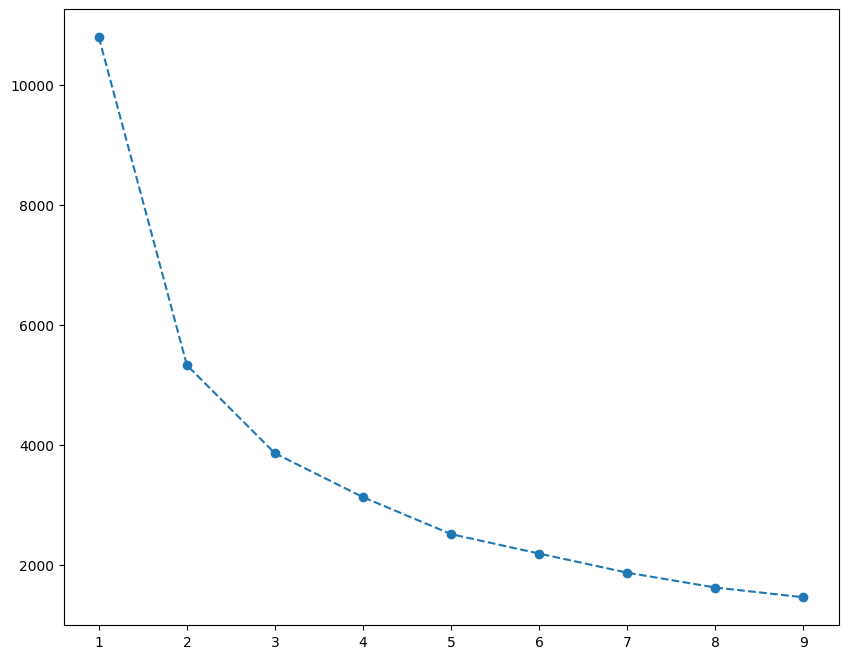

In [7]:
plt.figure(figsize=(10,8))
plt.plot(range(1,10), wcss, marker='o', linestyle='--')
plt.show()

In [8]:
kmeans_pca = KMeans(n_clusters = 2, init='k-means++', random_state=42, n_init=10)
kmeans_pca.fit(X_pca)


KMeans(n_clusters=2, n_init=10, random_state=42)

In [9]:
labels = kmeans_pca.labels_
#print(labels)

centroids = kmeans_pca.cluster_centers_

In [10]:
labels_aux = []
for num in labels:
    if num == 1:
        labels_aux.append("blue")
    else:
        labels_aux.append("red")

#print(labels_aux)

In [11]:
cmap = linear_cmap(field_name='y', palette="Spectral6", low=0, high=10)
print(cmap)

Field(field='y', transform=LinearColorMapper(id='p1001', ...), units=Unspecified)


In [12]:


p = figure(x_range=(-6, 16), y_range=(-8, 13), tools='box_select',
           title='K-Means Clustering')
p.background_fill_color = 'lightgrey'

source = ColumnDataSource({
    'x': X_pca[:,0], 
    'y': X_pca[:,1], 
    'color': labels_aux,

})

renderer = p.scatter(x='x', y='y', source=source, fill_color='color', size=8, alpha = 0.6)
p.scatter(x=centroids[:, 0], y=centroids[:, 1], marker='inverted_triangle', color='yellow', size =14)

table = DataTable(source=source, editable=True, height=200)

draw_tool = PointDrawTool(renderers=[renderer], empty_value='black')

p.add_tools(draw_tool)
p.toolbar.active_tap = draw_tool

#show(Column(p, table))
show(p)

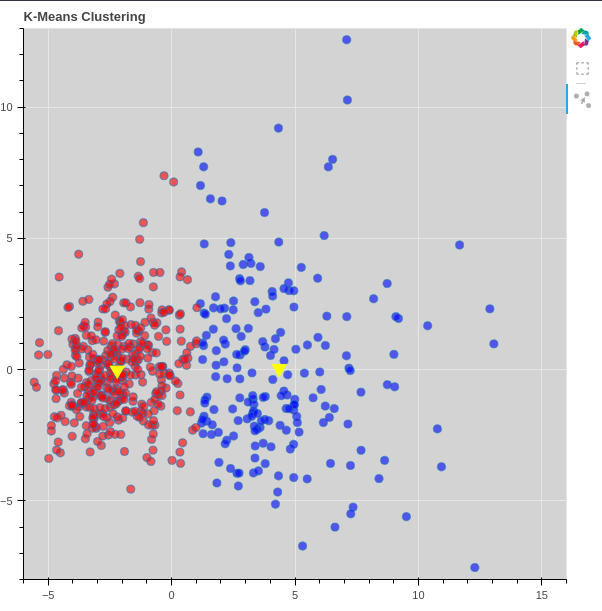

Opening in existing browser session.


libva error: vaGetDriverNameByIndex() failed with unknown libva error, driver_name = (null)


In [13]:
from IPython.display import display, Image

imagem_local = Image(filename='kmeans.png')
display(imagem_local)